# 🚀 Kaggle Competition Entry: Enhanced Bank Customer Churn Prediction ❤️


<img title="a title" alt="Alt text" src="bank-churn-img.png" width=500>


* Author: [Muhammad Bilal Khan](https://www.kaggle.com/devbilalkhan)
* Contact:
    - [Kaggle](https://www.kaggle.com/devbilalkhan)
    - [Twitter](https://twitter.com/devbilalkhan)
    - [Github](https://github.com/devbilalkhan)
* Email: bilal.khan@live.com
* Designation: Software Developer & Consultant
  
## Overview
In this competition, we are tasked with predicting bank customer churn based on a unique dataset. This dataset has been synthetically generated by a deep learning model, which was initially trained on the original Bank Customer Churn Prediction dataset. While the features mirror the original to a degree, subtle differences exist that may influence model predictions.

## Objective
The challenge is to not only develop a predictive model with high accuracy for customer churn but also to identify and leverage the nuances between the synthetic and original datasets. Competitors are encouraged to explore the original dataset alongside the provided one, examining the disparities and potentially utilizing it to enhance model robustness and performance.

## Strategy
My approach will involve a thorough exploratory data analysis to compare the synthetic and original datasets, hypothesis testing to understand feature relationships, and experimenting with various machine learning algorithms. The goal is to create a model that not only excels with the competition data but also gains insights from the original dataset to improve prediction outcomes.

---

Good luck to all participants — may the best model win!

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


The following function `print_heading` is used only for the purpose of printing headings text surrounded by lines to make the output look more readable.

In [241]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading.upper())
    print('-' * 50)

## Load Dataset

Leveraging the synergy of both the original Bank Customer Churn Prediction dataset and the provided synthetic training data, as encouraged, to potentially enhance model accuracy and generalization.

In [242]:
df = pd.read_csv("../projects/data/train.csv")
main = pd.read_csv("../projects/data/main.csv")

# 1.0. Dataset Inspection

In [243]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Data Types in the Dataset

| DataType | Count |
|----------|-------|
| int64    | 6     |
| float64  | 5     |
| object   | 3     |



## Shape of the Data
The dataset consists of records for 165,034 customers, each with 14 features. Below is the summary of the dataset dimensions:

| Description | Count |
|-------------|-------|
| Customers   | 165034|
| Features    | 14    |

## List all columns

In [245]:
# print the columns as a list
print_heading("Columns")

for col in main.columns:
    print(f"- {col}")


--------------------------------------------------
COLUMNS
--------------------------------------------------
- RowNumber
- CustomerId
- Surname
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited


# Dataset Summary Information

In [246]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Observation
- **CreditScore**: The average credit score in the dataset is approximately `656`, with a standard deviation of around `80`. The scores range from a minimum of `350` to a maximum of `850`, which suggests a wide variety of creditworthiness among the customers.

- **Age**: Customers have an average age of about `38 years` with a standard deviation of nearly `9 years`, indicating moderate age diversity. The age range is from `18 to 92 years`, showing that the dataset includes young adults to seniors.

- **Balance**: The mean account balance is about `55,478`, but with a large standard deviation of approximately `62,818`, indicating significant variability in customer balances. Notably, `25%` of customers have a balance of `0`, which could indicate a segment of customers that do not use their accounts actively.

- **Exited**: Approximately `21%` of customers have exited (the `Exited` column has a mean of `0.21`), pointing towards a churn rate that could be of interest for retention strategies. This is a binary variable, with `0` representing the customer has not exited and `1` representing the customer has exited.

In [247]:
target = "Exited"

# Inspecting Labels of Categorical Variables

In [248]:
# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
# drop Surname feature from cat
categorical_variables = categorical_variables.drop('Surname')
value_counts_dict = {}

# Get the value count 
for variable in categorical_variables:
    value_counts_dict[variable] = df[variable].value_counts()

# Initialize an empty list to store the data
data_list = []

# Append a tuple to the list for each category
for variable, counts in value_counts_dict.items():
    for category, count in counts.items():
        data_list.append((variable, category, count))
        
# Append an empty tuple to create a gap between variables
    data_list.append(("---", "---", "---"))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Make the variable column as an index
value_counts_df = value_counts_df.set_index('Variable')

# Display the DataFrame
value_counts_df

,Category,Count
Variable,,
Geography,France,94215
Geography,Spain,36213
Geography,Germany,34606
---,---,---
Gender,Male,93150
Gender,Female,71884
---,---,---


# Observations
* **Geographic Distribution:** There is a significant imbalance in the geographic distribution of the dataset. France has the highest representation with `94,215` entries, which is substantially more than Spain and Germany, with `36,213` and `34,606` entries respectively.

* **Gender Distribution:** The dataset shows an imbalance in gender with more `males (93,150)` than females `(71,884)`. However, the disparity is not as pronounced as it is in the geographic distribution.


# Inspecting Labels of Target Variable

In [249]:
exited_df = df[target].value_counts()
pd.DataFrame(exited_df)

,count
Exited,
0,130113
1,34921


# Observations
* **Retention Rate:** The majority of the customers in the dataset have not exited, with `130,113` customers still with the bank. This suggests that the bank has a strong retention rate overall.

* **Churn Rate**: There are `34,921` customers who have exited, which indicates that there is a churn issue that the bank could potentially address. While the number of customers remaining with the bank is higher, the churn rate is still significant.

* **Customer Insights:** The data on churn could be further analyzed to understand why these customers are leaving. Insights from this analysis could inform retention strategies.

* **Improvement Opportunity:** The bank has an opportunity to improve its churn rate by identifying the factors that contribute to customer exit and addressing them. This could involve looking at customer service, pricing, product offerings, and other aspects that impact customer satisfaction and loyalty.

# Correlation Matrix

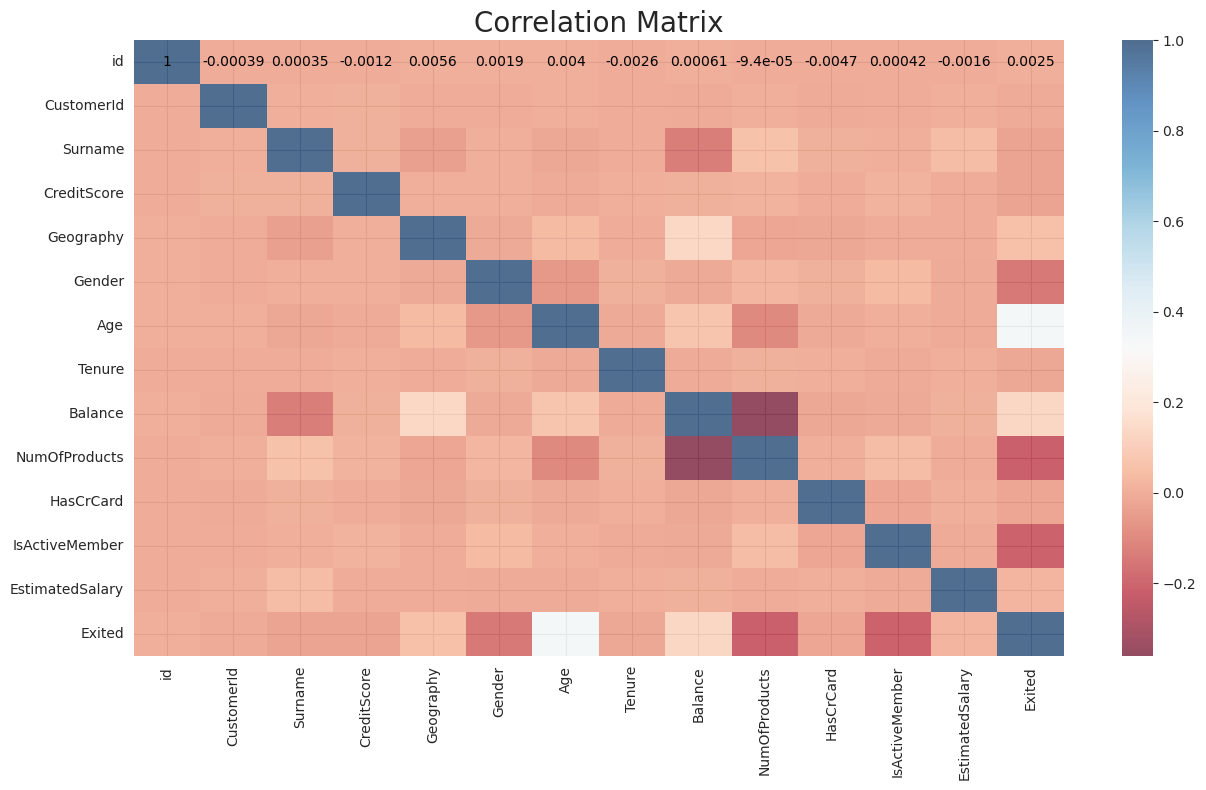

In [250]:
# generate correlation matrix for all features after label encoding 
df2 = df.copy()
sns.set_palette("pastel")
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index 
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False, annot_kws={"color": "black"})
plt.title('Correlation Matrix', fontsize=20)
plt.show()

## Correlation With Respect to Target Variable

In [251]:
# calculate the correlation of each feature with the target variable and sort in descending order
correlation = correlation_matrix[target].sort_values(ascending=False)
print_heading('Correlation of each feature with the target variable')
correlation

--------------------------------------------------
CORRELATION OF EACH FEATURE WITH THE TARGET VARIABLE
--------------------------------------------------


Exited             1.000000
Age                0.340768
Balance            0.129743
Geography          0.053343
EstimatedSalary    0.018827
id                 0.002512
CustomerId        -0.009947
Tenure            -0.019565
HasCrCard         -0.022141
CreditScore       -0.027383
Surname           -0.028328
Gender            -0.146442
IsActiveMember    -0.210237
NumOfProducts     -0.214554
Name: Exited, dtype: float64

# Observations
* **Highest Positive Correlation (Age):** With a correlation coefficient of `0.340768`, age shows the highest positive association with the target variable among the features listed. This indicates a trend where older customers are more prone to exit, hinting at a moderate tendency for customer churn.

* **Highest Negative Correlation (NumOfProducts):** With a correlation of `-0.214554`, the number of products a customer uses is the most negatively correlated feature with exiting. This implies that customers using more products are less likely to exit.

* **Near Zero Correlation (id, CustomerId):** The features id and CustomerId have correlations of `0.002512` and `-0.009947`, respectively, which are very close to zero. This indicates that these features have virtually no linear relationship with the likelihood of a customer exiting.

# Historgram of all features

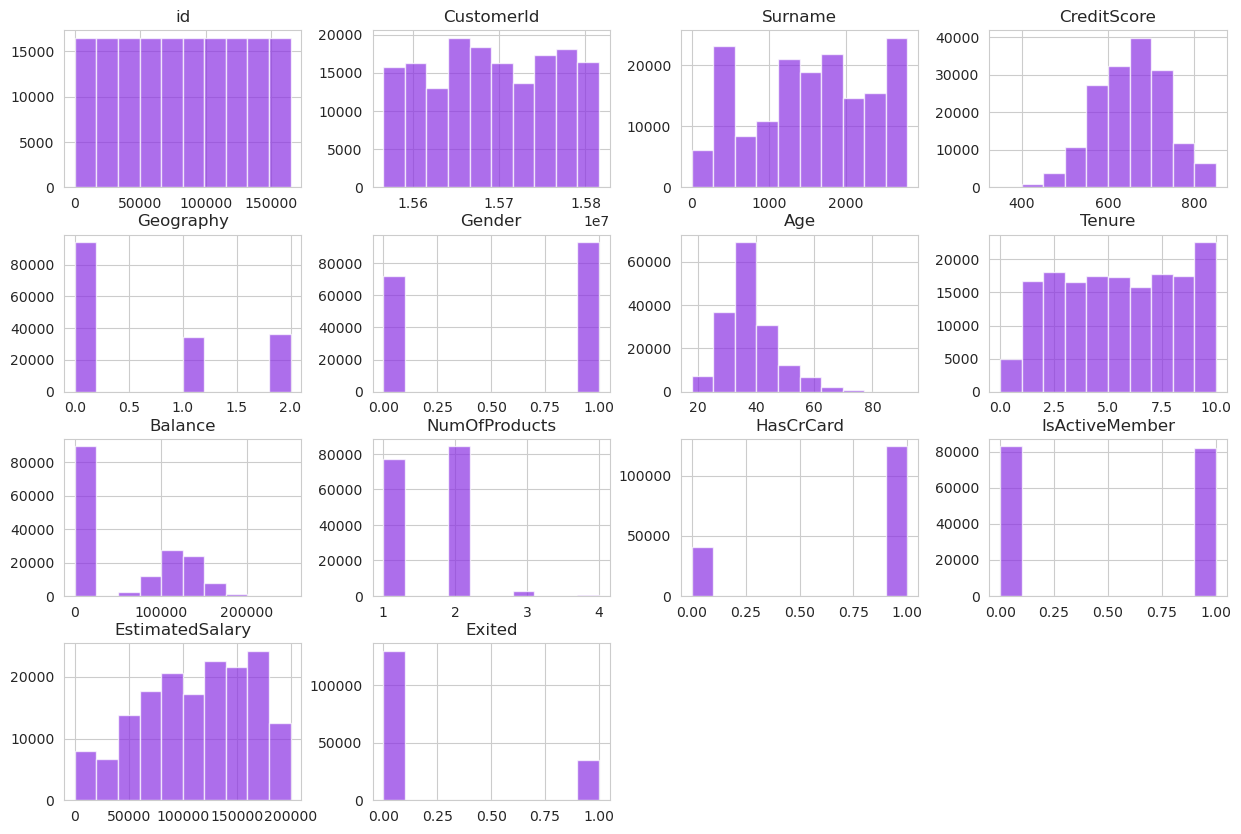

In [252]:
# plot histogram of all columns using sns
df2.hist(figsize=(15, 10), color='#8B30E3', alpha=0.7)

plt.show()

# Histograms of Selected Clinical Attributes (Continous Numerical) Grouped by Target Category

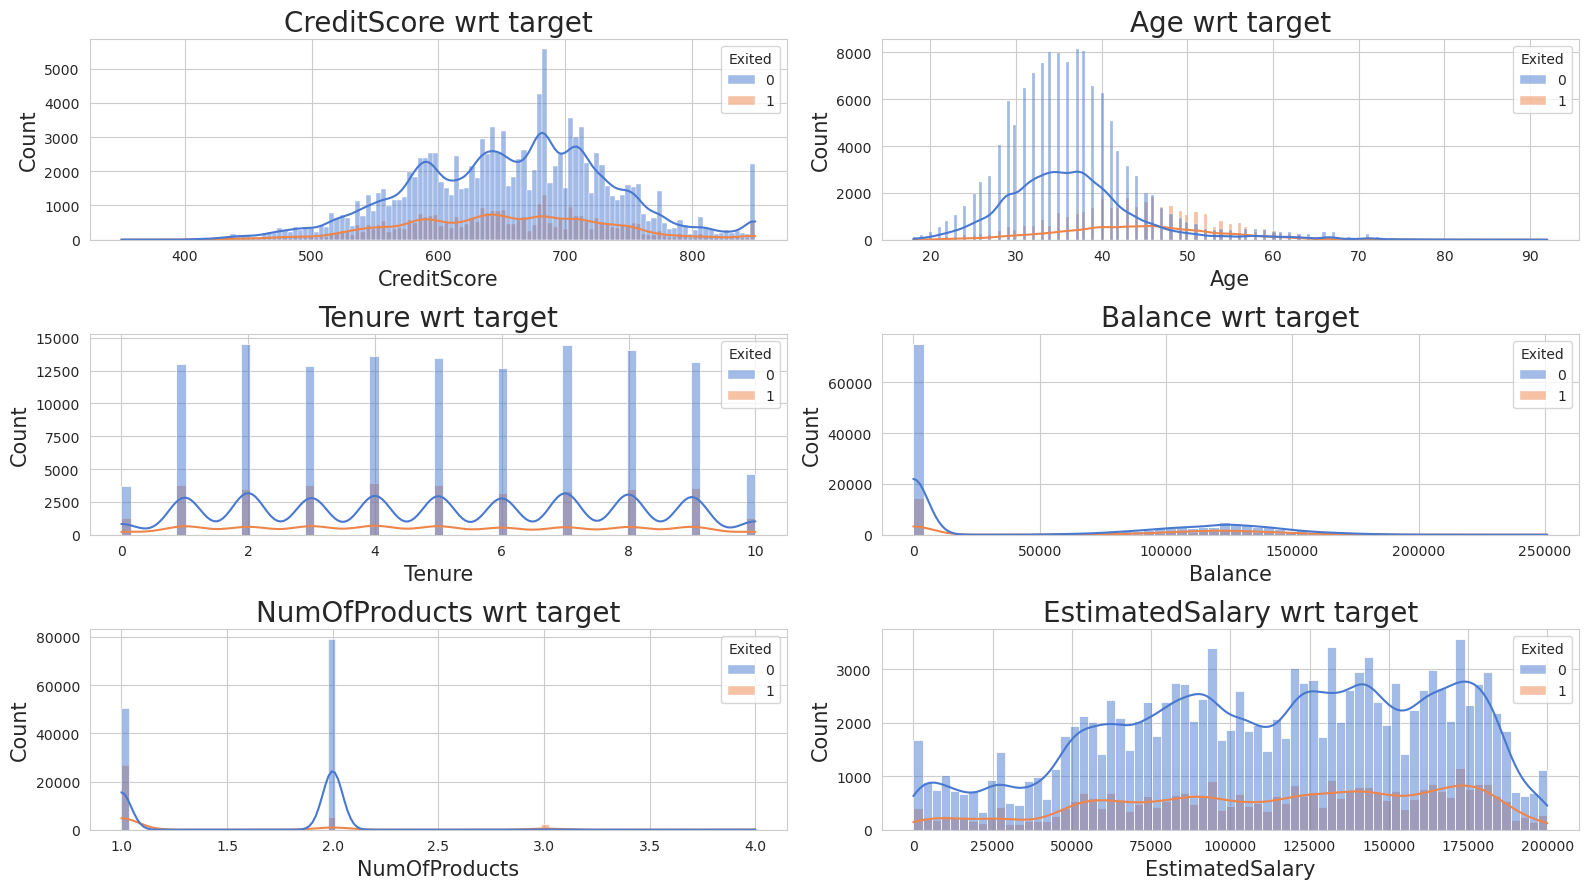

In [253]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define color palette
color_palette = sns.color_palette("muted", len(df[target].unique()))

# Specify the columns 
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Calculate the number of rows  based on the number of specified columns
num_plots = len(columns) 
num_rows = (num_plots + 1) // 2

# Set up the matplotlib figure grid
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 3))  
axes = axes.flatten()  

# Iterate over the specified columns to create individual plots
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, kde=True, hue= target , palette=color_palette, ax=axes[i])
    axes[i].set_title(f'{column} wrt target', fontsize=20)
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel('Count', fontsize=15)

# Remove any excess subplots if the number of specified columns is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout for better fit and to reduce any overlapping
plt.tight_layout()
plt.show()

# How strongly do the independent variables predict the dependent or target variable 'Exited'?

 I will now investigate whether there is a statistically significant association between the independent catergorical variables (X) and the dependent variable 'Exited' (Y), and to understand the nature of their relationship.

Descriptive Statistics of Churn rate by Gender

In [254]:
df.groupby('Gender')[target].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,71884.0,0.279687,0.448848,0.0,0.0,0.0,1.0,1.0
Male,93150.0,0.159055,0.365730,0.0,0.0,0.0,0.0,1.0


The dataset shows that females have a higher average churn rate, with about 28% having exited, compared to approximately 16% for males. This indicates that female customers are more likely to churn than male customers. Additionally, the data reveals a wider spread in the churn rate among females (greater standard deviation) than among males.

For the 75th percentile, 25% of females have a churn value of '1', suggesting that a quarter of female customers have churned. In contrast, the 75th percentile for males is '0', indicating that fewer than 25% of male customers have churned, as at least 75% of them are represented with a churn value of '0'. This reinforces the observation that churn is more prevalent among female customers in this dataset.

Descriptive Statistics of Churn rate by Geography

In [255]:
df.groupby('Geography')[target].describe()

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,94215.0,0.165282,0.371436,0.0,0.0,0.0,0.0,1.0
Germany,34606.0,0.378952,0.485133,0.0,0.0,0.0,1.0,1.0
Spain,36213.0,0.172176,0.377538,0.0,0.0,0.0,0.0,1.0


* France: The dataset contains 94,215 customers from France, with an average churn rate of about 16.5%. This suggests that churn among French customers is relatively lower, as indicated by the 75th percentile being '0', which means at least 75% of the customers from France have not churned.

* Germany: German customers, numbering 34,606 in the dataset, show a significantly higher average churn rate of approximately 37.9%. This is more than double the churn rate observed in France and Spain. The standard deviation is also higher, and the 75th percentile is '1', indicating that up to 25% of the customers from Germany have churned.

* Spain: There are 36,213 Spanish customers in the dataset, with an average churn rate of about 17.2%, which is slightly higher than France but much lower than Germany. Similar to France, the 75th percentile for Spain is '0', suggesting that less than 25% of the customers from Spain have churned.

# Plotting Violin graph of Age (Highest Correlation) by Target Variable

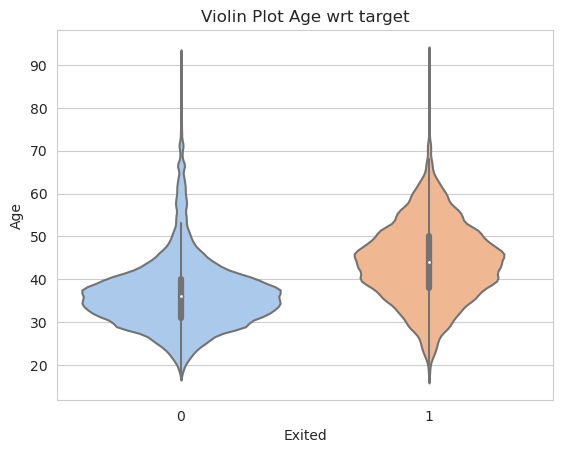

In [256]:
sns.violinplot(x=target, y='Age', data=df)
# Set the title and labels
plt.title('Violin Plot Age wrt target')
plt.ylabel('Age')
plt.xlabel('Exited')

# Display the plot
plt.show()

# Data Preprocessing

# What happens if we don't handle missing values?

## What are missing values?
Missing values are defined as the data points in the dataset that are not present or have not been recorded. They can occur due to various reasons such as errors in data collection, failure to fill in a value, or when an observation is not applicable or available.

If missing values are not handled, it can lead to skewed or incorrect analysis results because many algorithms cannot process `undefined` or `missing` or `unpresentable` values and may produce errors. Additionally, models trained on incomplete data may be biased or less accurate, undermining the reliability of predictions or inferences drawn from the dataset.

# Identifying Missing values

In [257]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

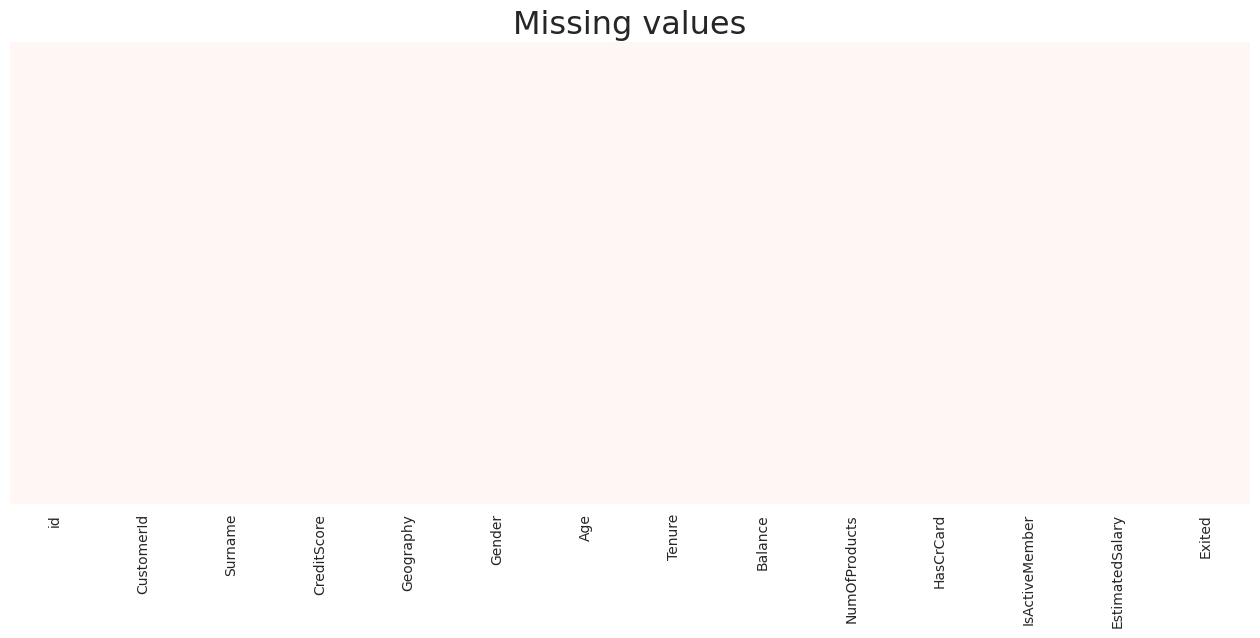

In [258]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values', size=23)
plt.show()

# Observation

 It appears that the dataset is complete with no absent entries. This suggests that the dataset is well-maintained and ready for further analysis or model training without the need for imputation or handling of missing data.

# Why Is Scaling Crucial for Continuous Variables in Heart Disease Prediction?

Scaling in data organization is the process of adjusting the range of variable values to aid in comparison and computation, especially in machine learning models that are sensitive to the magnitude of inputs.

In [259]:
# get only numerical columns 
num_cols = df.select_dtypes(include=np.number).columns
num_cols = num_cols.drop(['Exited', 'id', 'CustomerId', 'HasCrCard', 'IsActiveMember', 'NumOfProducts'])

df[num_cols].describe()


,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,112574.822734
std,80.103340,8.867205,2.806159,62817.663278,50292.865585
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,74637.570000
50%,659.000000,37.000000,5.000000,0.000000,117948.000000
75%,710.000000,42.000000,7.000000,119939.517500,155152.467500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [260]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns 
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#9468F8"]):
    # Set to "dark" for a black background
    #sns.set(style="dark", palette="deep")
    shade = "#0000ff"
    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#ffffff')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=1.5,medianprops={'color': 'white', 'linewidth': 2},
                    flierprops=dict(markerfacecolor=shade, marker='o', markeredgecolor=shade, markersize=5),
                    whiskerprops=dict(color=shade, linewidth=2.0),
                    capprops=dict(color=shade, linewidth=2.0),
                    boxprops=dict(edgecolor=shade, linewidth=2.0)),
                    
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#ffffff')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

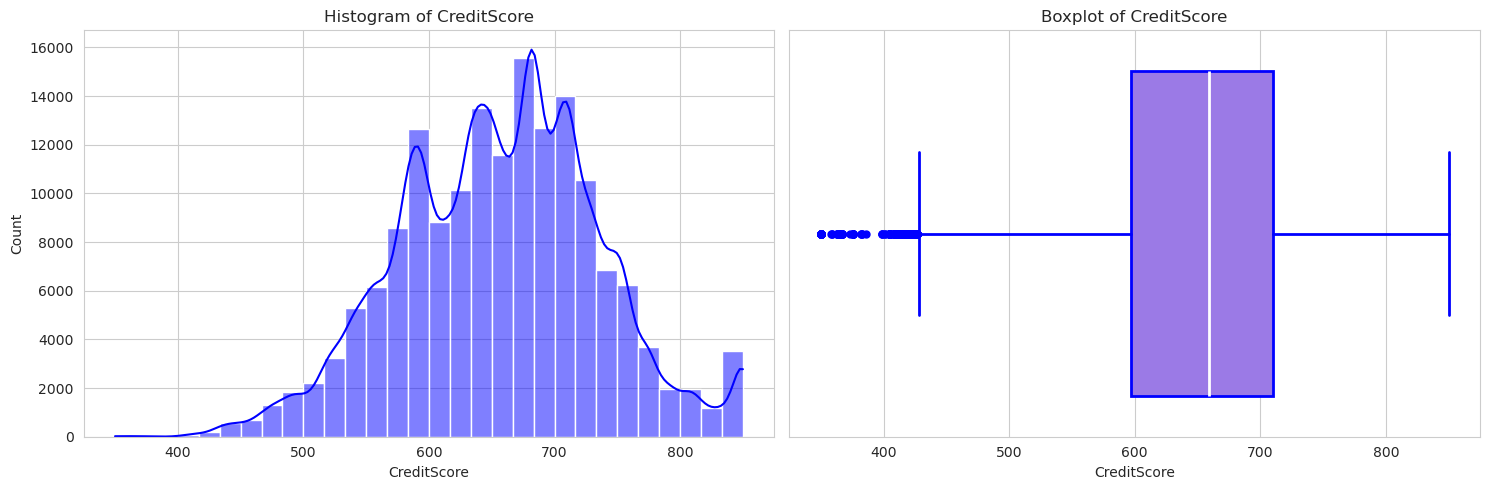

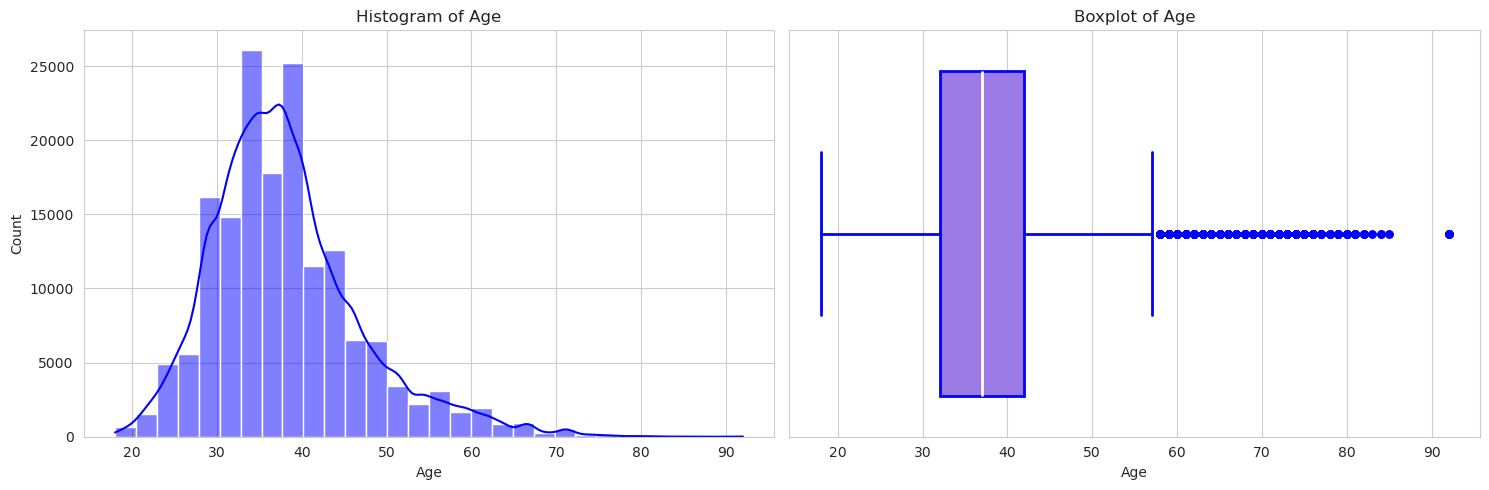

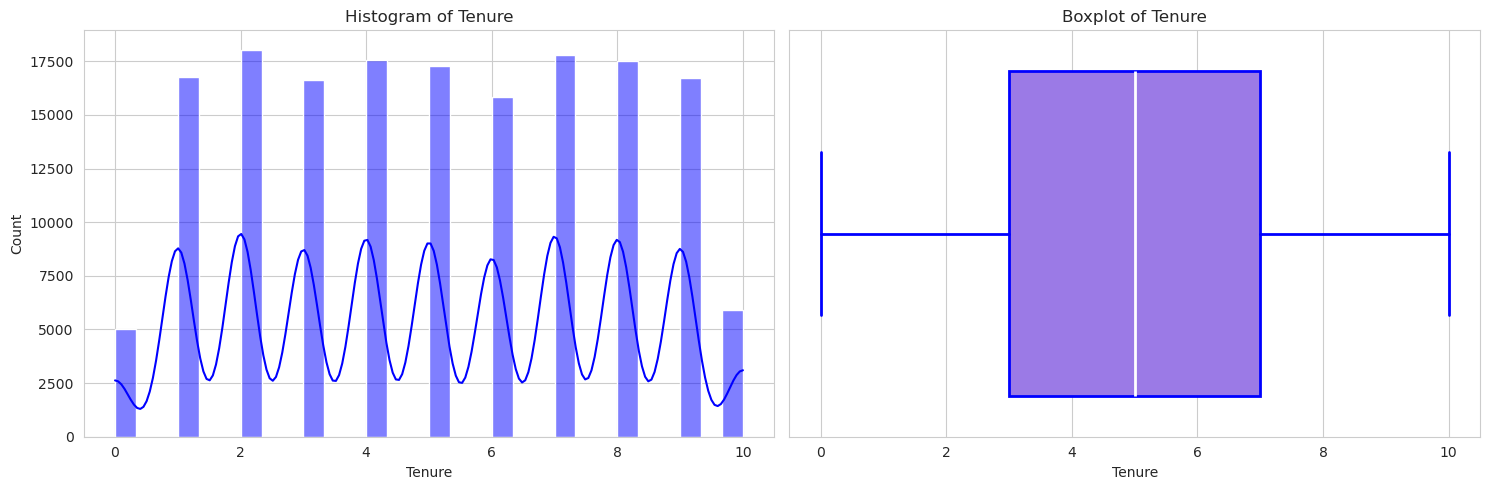

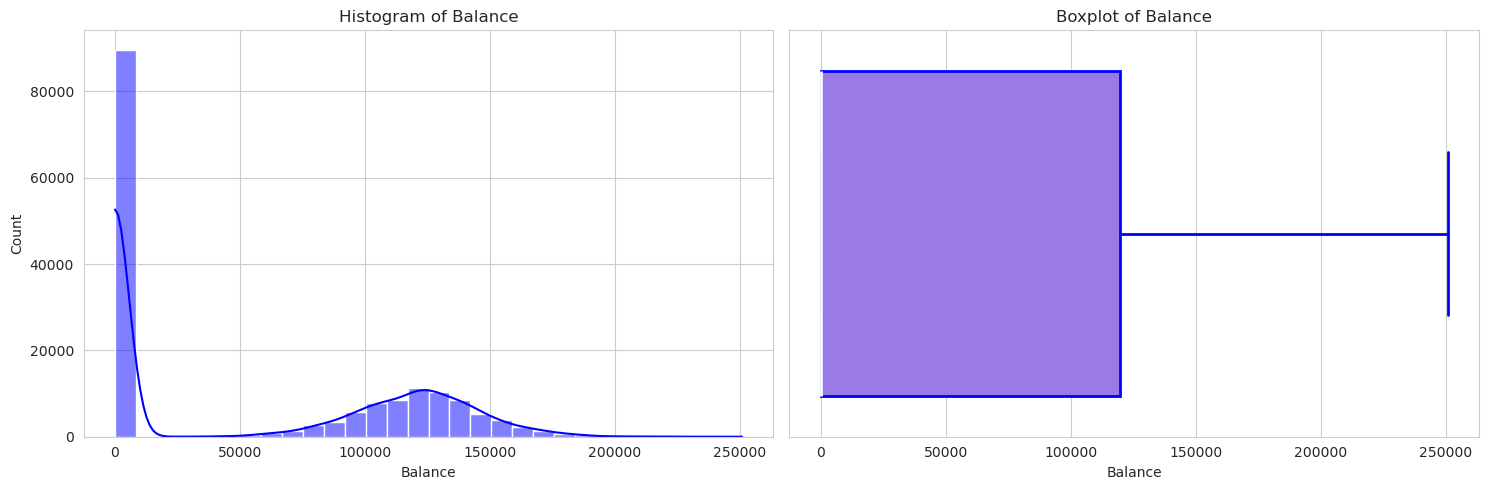

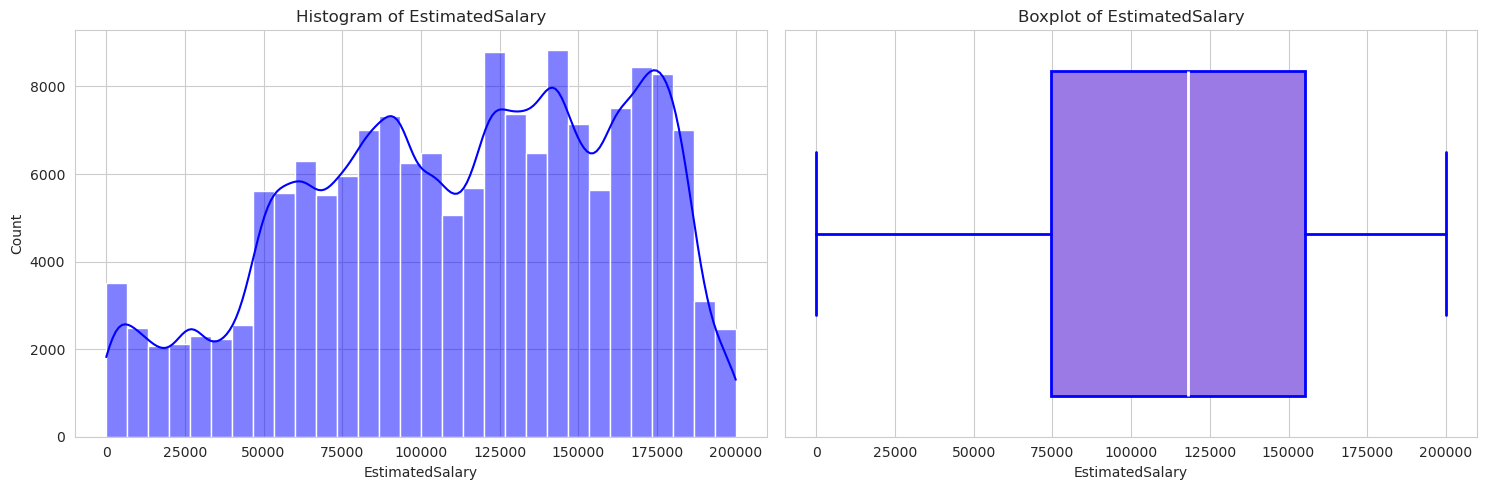

In [261]:
for col in num_cols:
    plot_histogram_and_boxplot(df, [col])

# Impact of Skewness on Model Performance 

Skewness in a dataset can lead to biased or inaccurate model predictions as many algorithms assume a normal distribution of data. Addressing skewness through transformations or robust model selection is crucial for improving model reliability.

In [262]:
# Generate a skew value table for numerical columns
skew_values = df[num_cols].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Skew': skew_values})
skew_df

,Skew
Age,0.968063
Balance,0.382020
Tenure,0.006490
CreditScore,-0.059291
EstimatedSalary,-0.309022


## Strategy

In the forthcoming steps of this analysis, I'll perform logarithmic scaling on specific numerical columns to normalize their scale. Subsequently, data transformation techniques will be employed to constrain the values within a desired range. This normalization is a preparatory step to ensure consistent numerical scales throughout this notebook. Additionally, the transformations aim to approximate a normal (bell-shaped) distribution for these variables, which is often beneficial for subsequent analytical processes.

In [263]:
# Define function to apply log transformation
def apply_log(df, columns):
    for column in columns:
        # Apply log transformation, add 1 to avoid log(0)
        df[column] = np.log(df[column] + 1)
    return df

# List of columns to transform
columns_to_transform = ['Age', 'CreditScore', 'Balance', 'Tenure', 'EstimatedSalary']

# Apply log transformation to specified columns
df = apply_log(df, columns_to_transform)


## Normalize Numerical Features

In [264]:
from sklearn.preprocessing import QuantileTransformer
# Define a function to apply QuantileTransformer to specified columns of a DataFrame
def apply_quantile_transformer(df, columns):
    qt = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=0)    
    for column in columns:
        # Apply the QuantileTransformer to the current column and replace the original column with the transformed data
        df[column] = qt.fit_transform(df[column].values.reshape(-1,1))
    # Return the transformed DataFrame
    return df

# List of columns to which the QuantileTransformer will be applied
columns_to_transform = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Apply the QuantileTransformer to the specified columns of the DataFrame
df = apply_quantile_transformer(df, columns_to_transform)

In [265]:
df[df.CreditScore > 3].count()

id                 2532
CustomerId         2532
Surname            2532
CreditScore        2532
Geography          2532
Gender             2532
Age                2532
Tenure             2532
Balance            2532
NumOfProducts      2532
HasCrCard          2532
IsActiveMember     2532
EstimatedSalary    2532
Exited             2532
dtype: int64

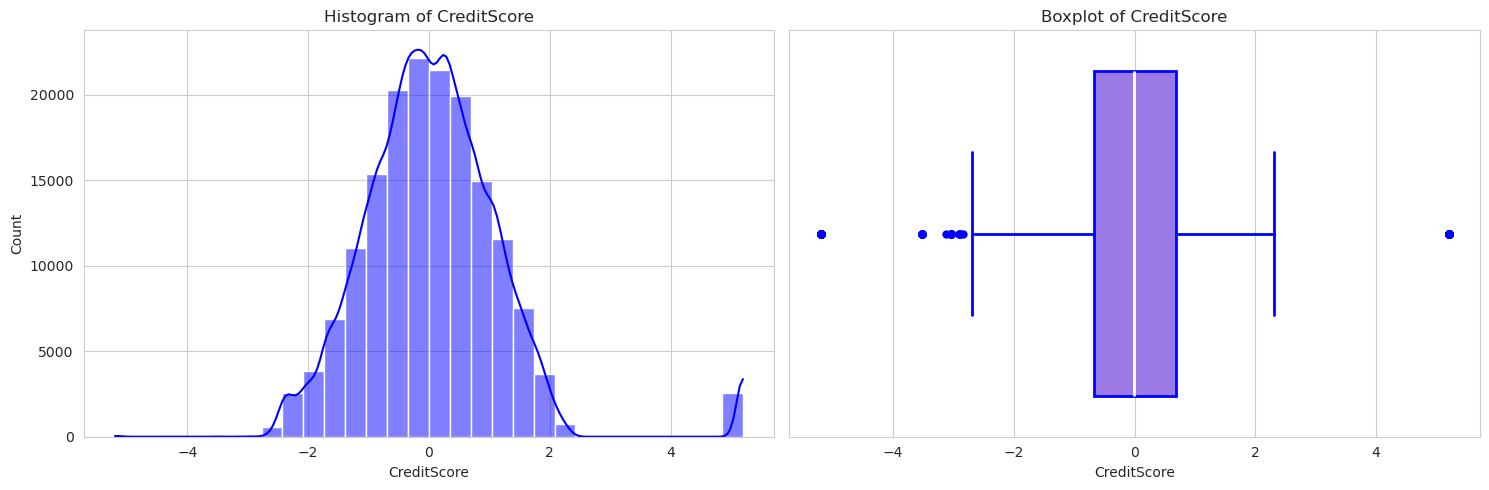

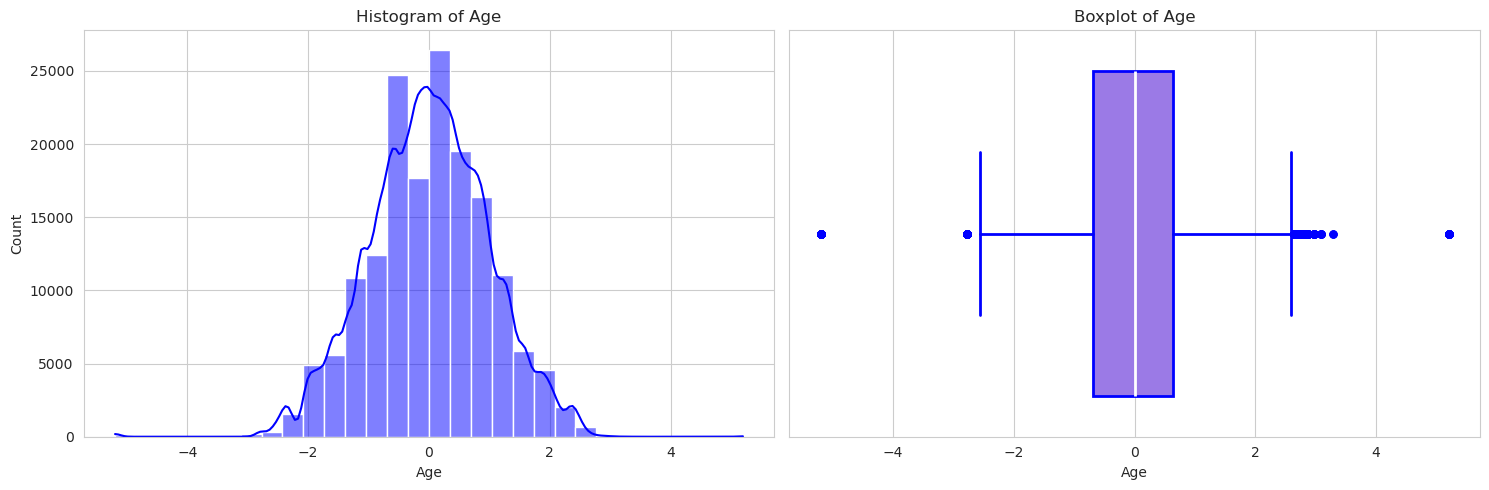

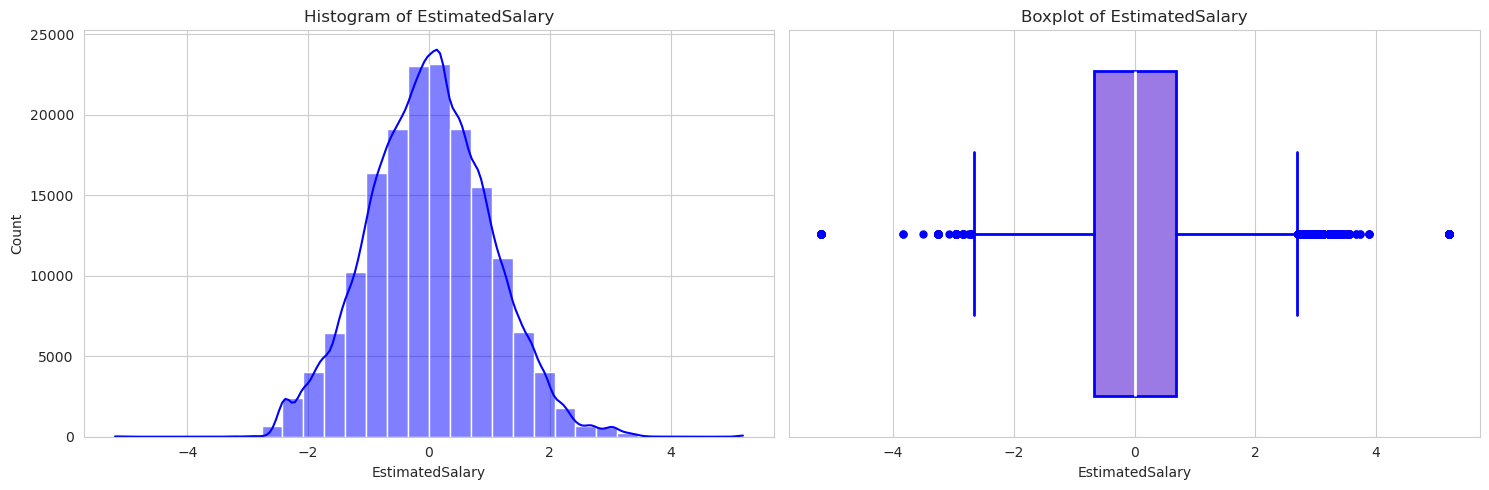

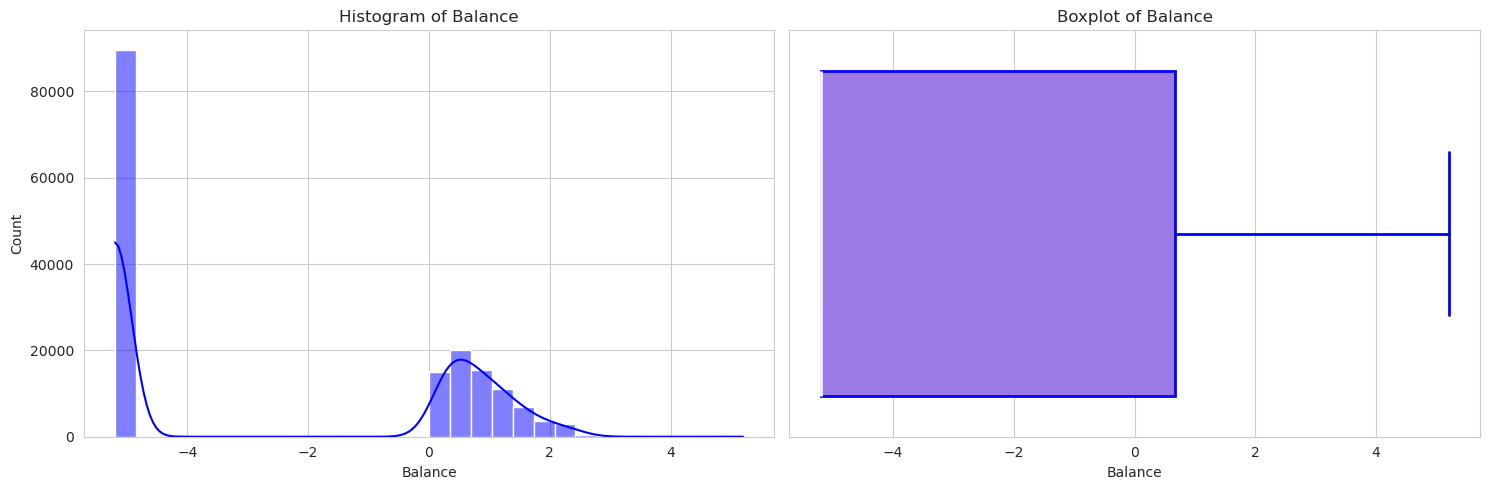

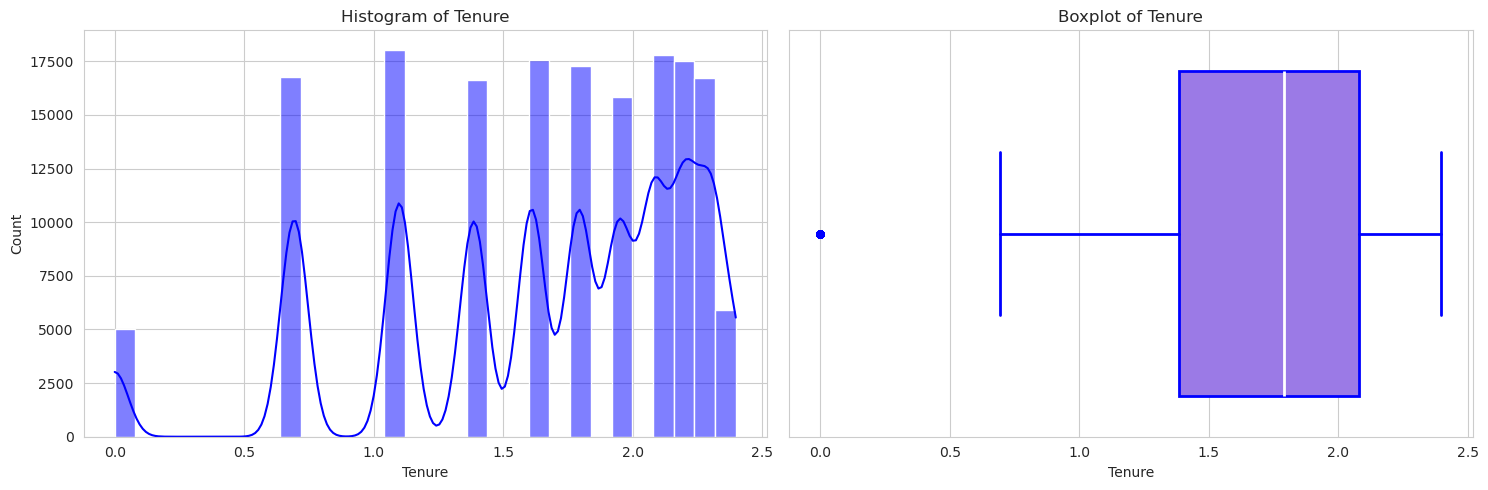

In [266]:
# List of columns to plot
columns_to_plot = ["CreditScore", "Age", "EstimatedSalary", "Balance", "Tenure"]

# Loop through each column in the list
for column in columns_to_plot:
    # Call the function to plot histogram and boxplot for the current column
    plot_histogram_and_boxplot(df, [column])

In [269]:
X_test = pd.read_csv("../projects/data/test.csv")

# Test with Machine Learning Models

In [274]:
X = df.drop(['Exited', 'id', 'CustomerId'], axis=1)
y = df['Exited']

# import train_test_split
from sklearn.model_selection import train_test_split

# encode
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [298]:
# Initialize accuracy list
from sklearn.decomposition import PCA
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
# import CatBoost classifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

# import accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
metrics = []
model = None
cfx = None
# Loop over PCA components
for i in range(1, X_train.shape[1] + 1):  # Start from 1
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    #classifiers
    #model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=4, min_samples_leaf=1, random_state=42)
    #model =  LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
    #model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
    model = XGBClassifier()
    #model  = CatBoostClassifier(verbose=False, random_state=42)
    model.fit(X_train_pca, y_train)
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=accuracy_score)

    
    y_pred = model.predict(X_test_pca)
   
    #cfx = confusion_matrix(confusion_matrix(y_test, y_pred))
    # Calculate metrics
    accuracy = round(accuracy_score(y_test, y_pred), 5)
    precision = round(precision_score(y_test, y_pred, average='weighted'), 5)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 5)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 5)
     # Append metrics to the results list
    metrics.append([f'{i}', accuracy, precision, recall, f1])
    
    print(f"Accuracy: {accuracy}")
    

Accuracy: 0.78929
Accuracy: 0.79301
Accuracy: 0.79359
Accuracy: 0.79274
Accuracy: 0.82337
Accuracy: 0.83622
Accuracy: 0.8361
Accuracy: 0.86027
Accuracy: 0.8656
Accuracy: 0.86454
Accuracy: 0.86494


In [301]:
results_df = pd.DataFrame(metrics, columns=['PCA', 'accuracy', 'precision', 'recall', 'f1_score'])
# sort based on accuracy
results_df.sort_values(by='accuracy', ascending=False, inplace=True)
results_df



,PCA,accuracy,precision,recall,f1_score
8,9,0.86560,0.85790,0.86560,0.85840
10,11,0.86494,0.85720,0.86494,0.85786
9,10,0.86454,0.85673,0.86454,0.85738
7,8,0.86027,0.85152,0.86027,0.85160
5,6,0.83622,0.82197,0.83622,0.82189
6,7,0.83610,0.82186,0.83610,0.82194
4,5,0.82337,0.80564,0.82337,0.80702
2,3,0.79359,0.75130,0.79359,0.73022
1,2,0.79301,0.75010,0.79301,0.72558
3,4,0.79274,0.74865,0.79274,0.72701
